<a href="https://colab.research.google.com/github/VaibhavPachpute21/ASHOK-ESTATE/blob/main/Copy_of_HACKANONS_COLAB_25GB_RAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
Datadirectory="/content/drive/MyDrive/train"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Classes=["angry","disgust","fear","happy","neutral","sad","surprise"]

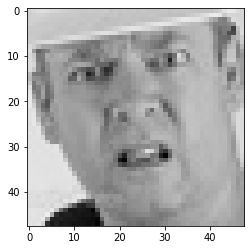

In [ ]:
img=cv2.imread("/content/drive/MyDrive/train/angry/Training_1021836.jpg")
plt.imshow(img)

/content/drive/MyDrive/train/angry


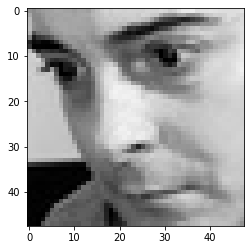

In [ ]:
for category in Classes:
  path=os.path.join(Datadirectory,category)
  for img in os.listdir(path):
    print(path)
    img_array=cv2.imread(os.path.join(path,img))
    plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
    plt.show()
    break;
  break
    

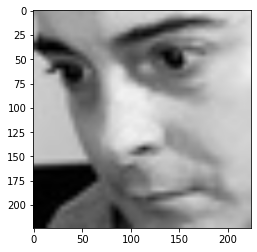

In [ ]:
img_size=224
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
new_array.shape

(224, 224, 3)

In [ ]:
training_Data=[]
def create_training_Data():
  for category in Classes:
    path=os.path.join(Datadirectory,category)
    class_num=Classes.index(category)
    for img in os.listdir(path):
      try:
        img_array=cv2.imread(os.path.join(path,img))
        new_array=cv2.resize(img_array,(img_size,img_size))
        training_Data.append([new_array,class_num])
      except Exception as e:
        pass


In [ ]:
create_training_Data()

In [ ]:
print(len(training_Data))

4936


In [ ]:
temp=np.array(training_Data)
temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


array([[array([[[146, 146, 146],
                [146, 146, 146],
                [146, 146, 146],
                ...,
                [227, 227, 227],
                [227, 227, 227],
                [227, 227, 227]],

               [[146, 146, 146],
                [146, 146, 146],
                [146, 146, 146],
                ...,
                [227, 227, 227],
                [227, 227, 227],
                [227, 227, 227]],

               [[147, 147, 147],
                [147, 147, 147],
                [146, 146, 146],
                ...,
                [226, 226, 226],
                [226, 226, 226],
                [226, 226, 226]],

               ...,

               [[  3,   3,   3],
                [  3,   3,   3],
                [  3,   3,   3],
                ...,
                [146, 146, 146],
                [145, 145, 145],
                [145, 145, 145]],

               [[  3,   3,   3],
                [  3,   3,   3],
                [  3,   3,   

In [ ]:
import random
random.shuffle(training_Data)

In [ ]:
x=[]
y=[]
for features,label in training_Data:
  x.append(features)
  y.append(label)

x=np.array(x).reshape(-1,img_size,img_size,3)

In [ ]:
x.shape

(4936, 224, 224, 3)

In [ ]:
x=x/255.0;


In [ ]:
Y=np.array(y)
Y.shape

(4936,)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model=tf.keras.applications.MobileNetV2()

14536120/14536120 [==============================] - 1s 0us/step


In [ ]:
model.summary()

In [ ]:
base_input=model.layers[0].input
base_output=model.layers[-2].output

In [ ]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [ ]:
final_output=layers.Dense(128)(base_output)
final_ouput=layers.Activation('relu')(final_output)
final_output=layers.Dense(64)(final_ouput)
final_ouput=layers.Activation('relu')(final_output)
final_output=layers.Dense(7,activation='softmax')(final_ouput)

In [ ]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [ ]:
new_model=keras.Model(inputs=base_input,outputs=final_output)

In [ ]:
new_model.summary()

In [ ]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
Y[1500]

3

In [ ]:
new_model.fit(x,Y,epochs=15)

In [ ]:
new_model.save('/content/model.h5')

In [ ]:
new_model=tf.keras.models.load_model('/content/model.h5')

In [ ]:
frame=cv2.imread("/content/sad.jpeg")

In [ ]:
frame.shape

(165, 306, 3)

In [ ]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [ ]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [ ]:
gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
gray.shape

(165, 306)

In [ ]:
faces=faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
  roi_gray=gray[y:y+h,x:x+w]
  roi_color=frame[y:y+h,x:x+w]
  cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
  faces=faceCascade.detectMultiScale(roi_gray)
  if len(faces)==0:
    print("Face not detected")
  else:
    for (ex,ey,ew,eh) in faces:
      face_roi=roi_color[ey:ey+eh,ex:ex+ew]

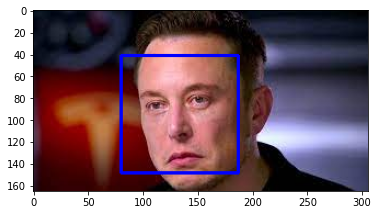

In [ ]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

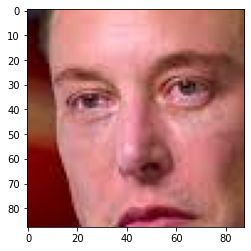

In [ ]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [ ]:
final_image=cv2.resize(face_roi,(224,224))
final_image=np.expand_dims(final_image,axis=0)
final_image=final_image/255.0

In [ ]:
Prediction=new_model.predict(final_image)
Prediction[0]

1/1 [==============================] - 0s 71ms/step


array([0.11253613, 0.02406515, 0.16246976, 0.09266502, 0.2756526 ,
       0.12090148, 0.21170984], dtype=float32)

In [ ]:
np.argmax(Prediction)

4

In [ ]:
import cv2 
path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN
# set the rectangle background to white
"rectangle_bgr = (255, 255, 255)"
# make a black image
"img = np.zeros((S00, 500))"
# set some text
"text = ""Some text in a box! """
# get the width and height of the text box
"(text_width, text_height) = cv2 .getText5ize(text, font, fontScale=font_scale, thickness=1)[0)"
# set the text start position
text offset x = 10
text_offset_y = img.shape [0) - 25
# make the coords of the box with a small padding of two pixels
"box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2)) cv2.rectangle (img, box_coords [0), box_coords [l], rectangle_bgr, cv2.FILLED)"
"cv2 .putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=l)"
cap = cv2.VideoCapture (l)
# Check if the webcam is opened correctly
if not cap.isOpened( ):
cap = cv2.VideoCapture(0) if not cap.isOpened( ):
raise IOError('Cannot open webcam '')
while True :
"ret,frame = cap.read ()"
#eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye .xml')
"faceCascade = cv2 .CascadeClass ifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml' ) gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)"
Taceascaoe = CVL.LascaoeLiass1T1er cvL.oaca .naarcascaoes +  naarcascaoe_TroncaiTace_oeT auic.xmi J
"gray = cv2.cvtColor(frame, cv2 .COLOR_BGR2GRAY)"
#print(faceCascode .empty ())
"faces = faceCascade.detectMultiScale(gray,1.1,4) for x,y,w,h in faces:"
"roi_gray = gray[y:y+h, x:x+w) roi_color = frame [y:y+h, x:x+w)"
"cv2.rectangle(frame, (x, y), (x+w,y+h), (255, 0, 0), 2) facess = faceCascade .detectMultiScale(roi_gray)"
if len(facess) == 0:
print (''Face not detected'') else:
"for (ex,ey,ew,eh) in facess:"
"face_roi = roi_color[ey: ey+eh, ex:ex + ew] ## cropping the face"
"final_image =cv2.resize(face_roi, (224,224))"
"final_image = np.expand_dims (final_image,axis =0) ## need fourth dimension"
final_image=final_image/255.0
font = cv2.FONT_HERSHEY_SIMPLEX
Predictions = new_model.predict (final_image)
font scale = 1.5
font = cv2.FONT_HERSHEY_PLAI N
if (np .argmax (Predictions)==0): status = ''Angry ''
"xl,yl,wl,hl = 0,0,175,75"
# Draw black background rectangle
"cv2.rectangle(frame, (xl, xl), (xl + wl, yl + hl), (0,0,0), -1)"
# Add text
"cv2.putText(frame, status, (xl + int(wl/10),yl + int(hl/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255), 2)"
"cv2.putText (frame,status,(100, 150),font, 3,(0, 0, 255),2,cv2.LINE_4)"



